In [1]:
import pandas as pd
import geopandas as gpd

import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.pardir)))

from VASA import VASA

In [2]:
# Read in USA counties geojson file
counties_map = gpd.read_file("../test data/counties.geojson") \
    .set_crs(epsg=4326) \
    .to_crs("+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs")

# filter out states not in the continental US
counties_map = counties_map[[(state != '02' and state != '15' and int(state) < 60) for state in counties_map.STATEFP]]

counties_map.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-2168086.764 33798.997, -2176962.349..."
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((1901690.921 519844.627, 1902812.906 ..."
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-629496.462 227201.747, -576250.975 ..."
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((1476930.940 -269973.669, 1488024.098..."
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-521740.024 -394881.325, -510740.158..."


In [3]:
# read in the Safegraph data file:
data = pd.read_csv("../test data/counties.csv")

# We need to ensure that these GEOID's match the ones in our GeoDataFrame - add leading zeros
data.fips = [f"{d:05}" for d in data.fips]

data.head()

,fips,ds_m4,sg_avg_dist2
0,45035,2020-01-01,11066.255084
1,45035,2020-01-02,13048.934918
2,45035,2020-01-03,13383.727687
3,45035,2020-01-04,11845.334563
4,45035,2020-01-05,9796.491319


In [ ]:
# Load data into a VASA object
v = VASA(
    df=data,
    gdf=counties_map,
    group_summary=lambda g: g[:2], # state level
    df_group_col="fips",
    gdf_group_col="GEOID",
    date_col="ds_m4",
    temp_res="week",               # get weekly average values
    date_format="%Y-%m-%d"
)
v.fill_missing()
v.lisa(k=3, type="union")

In [5]:
# When developing, I recommend making changes in the scatter.py file, 
# copying that file into this cell and commenting out the import in the 
# next cell. It takes some time to read in the file + run lisa

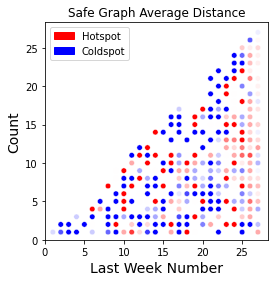

In [6]:
from VASA.scatter import Scatter
sc = Scatter(v, titles=["Safe Graph Average Distance"])

sc.plot()

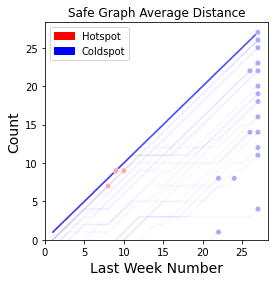

In [7]:
sc.plot(highlight="06")  # highlight counties in California (fips code = 06)